In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv('data\stud.csv')

In [4]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
273,female,group D,some college,standard,none,65,70,71
913,female,group C,bachelor's degree,free/reduced,completed,47,62,66
669,male,group D,associate's degree,standard,completed,81,72,77
491,female,group C,associate's degree,standard,none,64,64,70
247,female,group B,high school,standard,completed,58,70,68


In [15]:
X = df.drop(columns='math score')
y = df['math score']

In [16]:
num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns

In [17]:
preprocessor = ColumnTransformer(transformers=[
    ('one hot encoder',OneHotEncoder(sparse_output=False),cat_cols),
    ('standard scaler',StandardScaler(),num_cols)
],remainder='passthrough')

In [19]:
X = preprocessor.fit_transform(X)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [23]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [29]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)

    return mae,rmse,r2

In [35]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso Regression':Lasso(),
    'Ridge Regression':Ridge(),
    'K-Nearest Neighbors':KNeighborsRegressor(),
    'Decision Trees':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XG Boost Regressor':XGBRegressor(),
    'CatBoosting Regressor':CatBoostRegressor(verbose=False),
    'AdaBoost Regressor':AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ##evaluate 
    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performace for Training Set")
    print('- Root Mean Squared Error :',model_train_rmse)
    print('- Mean Absolute Error :',model_train_mae)
    print('- R2 Score :',model_train_r2)

    print('--------------------------------------')

    print('Model Performance for Testing Set')
    print('- Root Mean Squared Error :',model_test_rmse)
    print('- Mean Absolute Error :',model_test_mae)
    print('- R2 Score :',model_test_r2)

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performace for Training Set
- Root Mean Squared Error : 5.324354270503339
- Mean Absolute Error : 4.267138671875
- R2 Score : 0.8742556463650867
--------------------------------------
Model Performance for Testing Set
- Root Mean Squared Error : 5.3959872842671395
- Mean Absolute Error : 4.2158203125
- R2 Score : 0.8803449074540941


Lasso Regression
Model Performace for Training Set
- Root Mean Squared Error : 6.593815587795566
- Mean Absolute Error : 5.206302661246526
- R2 Score : 0.8071462015863456
--------------------------------------
Model Performance for Testing Set
- Root Mean Squared Error : 6.519694535667419
- Mean Absolute Error : 5.157881810347763
- R2 Score : 0.8253197323627853


Ridge Regression
Model Performace for Training Set
- Root Mean Squared Error : 5.323324922741654
- Mean Absolute Error : 4.26498782372598
- R2 Score : 0.8743042615212909
--------------------------------------
Model Performance for Testing Set
- Root Mean Squared Error : 5.3

In [36]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge Regression,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849821
8,AdaBoost Regressor,0.848576
6,XG Boost Regressor,0.827797
1,Lasso Regression,0.825320
3,K-Nearest Neighbors,0.783813
4,Decision Trees,0.745540


### Linear Regression

In [59]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(f'Accuracy of the Model is {score:.2f}')

Accuracy of the Model is 88.03


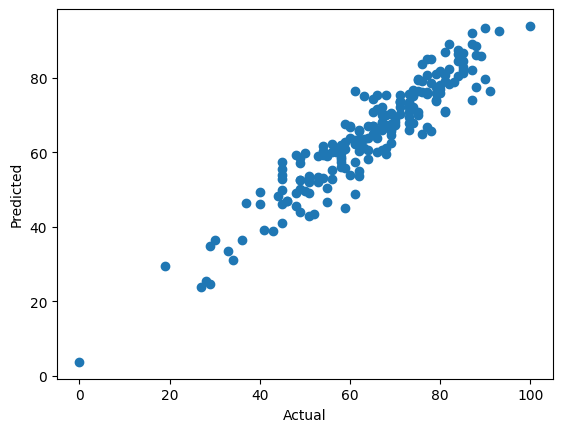

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

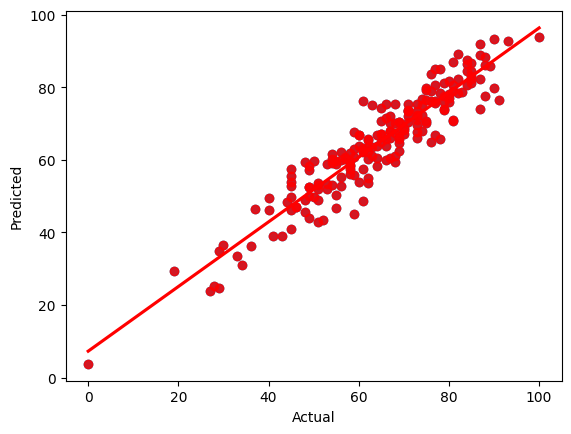

In [61]:
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [66]:
pred_df = pd.DataFrame({'Actual Value ':y_test,'Predicted Value ':y_pred,'Difference ':y_test-y_pred})

In [67]:
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
